In [2]:
# Conectando o colab com o drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/trab final cd'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Carregando os três datasets
order_items = pd.read_csv(path+'/olist_order_items_dataset.csv')
orders = pd.read_csv(path+'/olist_orders_dataset.csv')
products = pd.read_csv(path+'/olist_products_dataset.csv')

In [4]:
# ESTRUTURA DOS DATASETS:
# order_items: contém 'order_id' e 'product_id' - é a tabela que liga pedidos aos produtos
# orders: contém 'order_id' (chave primária) e informações sobre o pedido (data, status, etc.)
# products: contém 'product_id' (chave primária) e informações sobre o produto (categoria, peso, etc.)

# ESTRATÉGIA DE JUNÇÃO:
# Primeiro juntamos 'order_items' com 'orders' usando a coluna 'order_id'
# Isso nos dá informações dos pedidos + itens dos pedidos
# Depois juntamos o resultado com 'products' usando a coluna 'product_id'
# Isso adiciona as informações completas dos produtos

# Unindo os datasets em um só DataFrame
df_completo = (order_items.merge(orders, on='order_id', how='left').merge(products, on='product_id', how='left'))
 # Adiciona infos detalhadas dos produtos
# Junta os itens do pedido com infos do pedido


In [5]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

In [6]:
# Visualizar as primeiras 5 linhas do dataset
df_completo.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [7]:
df_completo.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [8]:
# Exploração dos Dados
# Dataset Olist unificado
# Linhas: 112.650
# Colunas: 22

# Tipos de dados
# 12 colunas 'object' → contêm IDs, categorias, datas.
# 10 colunas numéricas → medidas, preços, pesos.
# Colunas datetime ainda estão como 'object', então precisaremos converter:
# shipping_limit_date
# order_purchase_timestamp
# order_approved_at
# order_delivered_carrier_date
# order_delivered_customer_date
# order_estimated_delivery_date

# Valores Ausentes
# order_approved_at                  | 15
# order_delivered_carrier_date       | 1.194
# order_delivered_customer_date      | 2.454
# product_category_name              | 1.603
# product_name_lenght                | 1.603
# product_description_lenght         | 1.603
# product_photos_qty                 | 1.603
# product_weight_g                   | 18
# product_length_cm                  | 18
# product_height_cm                  | 18
# product_width_cm                   | 18

In [9]:
# Convertendo as colunas que precisam estar como datetime64[ns]
# Essas colunas tão como object e o pandas trata como strings, ai elas precisam ser convertidas
import pandas as pd

df_completo['shipping_limit_date'] = df_completo['shipping_limit_date'].astype('datetime64[ns]')

df_completo['order_purchase_timestamp'] = df_completo['order_purchase_timestamp'].astype('datetime64[ns]')

df_completo['order_approved_at'] = df_completo['order_approved_at'].astype('datetime64[ns]')

df_completo['order_delivered_carrier_date'] = df_completo['order_delivered_carrier_date'].astype('datetime64[ns]')

df_completo['order_delivered_customer_date'] = df_completo['order_delivered_customer_date'].astype('datetime64[ns]')

df_completo['order_estimated_delivery_date'] = df_completo['order_estimated_delivery_date'].astype('datetime64[ns]')

In [10]:
df_completo.info()
# verificando a conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              112635 non-null  datetime64[ns]
 11  

In [11]:
# Duas colunas tão com os nomes errados então nós corrigimos
df_completo = df_completo.rename(columns={
'product_name_lenght': 'product_name_length',
'product_description_lenght': 'product_description_length'})


In [12]:
# Vendo se os nomes das colunas foram corrigidos
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              112635 non-null  datetime64[ns]
 11  

In [13]:
# LIMPEZA DE DADOS
# Verificando quantas linhas duplicadas existem
duplicadas = df_completo.duplicated().sum()
duplicadas
# Sem nenhuma duplicadas

np.int64(0)

In [14]:
# linhas duplicadas
df_completo[df_completo.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


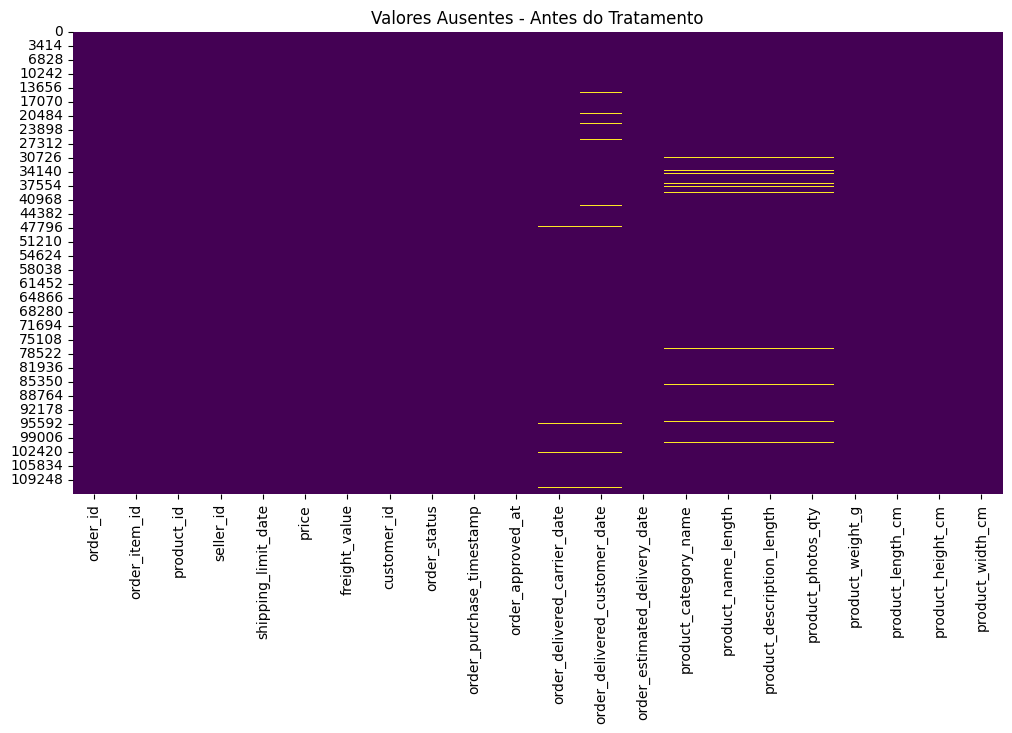

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df_completo.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Ausentes - Antes do Tratamento')
plt.show()

In [16]:
# Alguma colunas não podem ter valores nulos ou 0, como a coluna de preço e peso e etc. Então a gnt fez aqui a soma de valores nulos/0 dessas colunas
print("nulos ou zerados na coluna preco =", df_completo["price"].isnull().sum())
print("nulos ou zerados na coluna frete =", df_completo["freight_value"].isnull().sum())
print("nulos ou zerados na coluna peso =", df_completo["product_weight_g"].isnull().sum())
print("nulos ou zerados na coluna altura =", df_completo["product_height_cm"].isnull().sum())
print("nulos ou zerados na coluna largura =", df_completo["product_width_cm"].isnull().sum())
print("nulos ou zerados na coluna comprimento =", df_completo["product_length_cm"].isnull().sum())



nulos ou zerados na coluna preco = 0
nulos ou zerados na coluna frete = 0
nulos ou zerados na coluna peso = 18
nulos ou zerados na coluna altura = 18
nulos ou zerados na coluna largura = 18
nulos ou zerados na coluna comprimento = 18


In [17]:
# Essa coluna não pode ser preenchida com o valor da media da coluna
# Ja que alguns produtos tem pesos muito diferentes
df_completo[df_completo["product_weight_g"] == 0].head(20)
# A coluna 'product_length_cm' que é da categoria 'cama_mesa_banho' tem uma inconsistência que são valores nulos
# Para resolver isso a gnt verificou a media da coluna e substituiu os valores nulos

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2972,06afc1144eb9f51ef2aa90ec9223c7f4,1,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-23 17:25:20,129.9,23.71,e8be078dee76002545a9c5f10b7d7c4e,delivered,2018-08-15 17:13:07,...,2018-08-24 22:54:42,2018-09-20,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
2973,06afc1144eb9f51ef2aa90ec9223c7f4,2,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-23 17:25:20,129.9,23.71,e8be078dee76002545a9c5f10b7d7c4e,delivered,2018-08-15 17:13:07,...,2018-08-24 22:54:42,2018-09-20,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
3052,06d9e69034388abf6da64378e10737b8,1,36ba42dd187055e1fbe943b2d11430ca,b39d7fe263ef469605dbb32608aee0af,2018-08-10 09:10:11,100.0,23.85,afef0047e43944e8c6630ec0d0f7de2e,delivered,2018-07-30 10:42:40,...,2018-08-09 22:18:29,2018-09-10,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
3053,06d9e69034388abf6da64378e10737b8,2,36ba42dd187055e1fbe943b2d11430ca,b39d7fe263ef469605dbb32608aee0af,2018-08-10 09:10:11,100.0,23.85,afef0047e43944e8c6630ec0d0f7de2e,delivered,2018-07-30 10:42:40,...,2018-08-09 22:18:29,2018-09-10,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
14080,200b121c28e10ef638131a7c76753327,1,81781c0fed9fe1ad6e8c81fca1e1cb08,b39d7fe263ef469605dbb32608aee0af,2018-08-14 16:10:16,100.0,19.89,26bcca10e5c9679c306d8333bf527929,delivered,2018-08-04 15:55:59,...,2018-08-23 18:21:59,2018-08-30,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
31488,476b812a7e4fc972646eb390517bddcb,1,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-22 11:30:42,129.9,23.71,18a1176652a9344ba489fa4ccaa3c20f,delivered,2018-08-18 11:09:12,...,2018-08-30 16:56:44,2018-09-12,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32984,4abc7b5330425bcf9c2f7f48151a88c0,1,8038040ee2a71048d4bdbbdc985b69ab,b39d7fe263ef469605dbb32608aee0af,2018-08-09 21:31:33,129.9,14.49,d1568f1104d2015dc70bdf7d9ab88dd2,delivered,2018-07-31 21:05:49,...,2018-08-07 23:56:48,2018-08-17,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
79374,b489f7ae130ba3fd26b0a20f8cc81c61,1,e673e90efa65a5409ff4196c038bb5af,b39d7fe263ef469605dbb32608aee0af,2018-08-22 20:49:57,129.9,23.71,99411e9599f8b7a90f2a362b874b66ca,delivered,2018-08-18 20:37:22,...,2018-08-27 14:52:02,2018-09-04,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [18]:
# Descobrindo a media da coluna
mediana_peso_categoria = df_completo[df_completo["product_category_name"] == "cama_mesa_banho"]["product_weight_g"].median()
mediana_peso_categoria


1275.0

In [19]:
# Substituindo peso = 0 pela mediana da categoria
df_completo.loc[df_completo["product_weight_g"] == 0, "product_weight_g"] = 1275.0

# Conferindo se ainda existem zeros
(df_completo["product_weight_g"] == 0).sum()


np.int64(0)

In [20]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              112635 non-null  datetime64[ns]
 11  

In [ ]:
# Tratamento de valores ausentes
# Categóricas: preencher com "sem_categoria"
df_completo['product_category_name'] = df_completo['product_category_name'].fillna('sem_categoria')


In [21]:
# Tratamento de valores ausentes
# Preencher nulos com a media da coluna
# order_approved_at → preencher com a data de compra (faz sentido)
df_completo['order_approved_at'] = df_completo['order_approved_at'].fillna(df_completo['order_purchase_timestamp'])

# order_delivered_carrier_date → preencher com a média real da coluna (não depende da categoria)
media_carrier = df_completo['order_delivered_carrier_date'].median()
df_completo['order_delivered_carrier_date'] = df_completo['order_delivered_carrier_date'].fillna(
    media_carrier
)

# order_delivered_customer_date → preencher com a média real da coluna
media_customer = df_completo['order_delivered_customer_date'].median()
df_completo['order_delivered_customer_date'] = df_completo['order_delivered_customer_date'].fillna(
    media_customer
)



In [22]:
# Muitos pedidos nulos nessa coluna são porque o pagamento não foi aprovado ou a informação se perdeu.
# Faz mais sentido preencher a data de aprovação com a data da compra.

# A coluna de referência (o que vms usar para preencher) é 'order_purchase_timestamp'.
coluna_data_compra = df_completo['order_purchase_timestamp']

# Preenchemos a coluna de aprovação com a coluna de compra, só onde for nulo.
df_completo['order_approved_at'] = df_completo['order_approved_at'].fillna(coluna_data_compra)

# Agora, a data que o produto foi entregue para a transportadora.
# Como é difícil chutar essa data, vamos usar um valor 'central' para não bagunçar
# a análise dos tempos de entrega.
# Usar a MEDIANA é mais seguro que a média, porque a mediana não é afetada
# por entregas muito rápidas ou muito demoradas (os 'outliers').

# Calculamos o valor central (mediana) da coluna:
valor_mediano_entrega_transportadora = df_completo['order_delivered_carrier_date'].median()

# Preenchemos os valores nulos com esse valor central:
df_completo['order_delivered_carrier_date'] = df_completo['order_delivered_carrier_date'].fillna(valor_mediano_entrega_transportadora)

# Por fim, vms preencher a data que o produto chegou na casa do cliente.
# A lógica é a mesma da transportadora: vamos usar o valor MEDIANO
# de todas as entregas já feitas.

# Calculamos o valor central (mediana) da coluna de entrega final:
valor_mediano_entrega_cliente = df_completo['order_delivered_customer_date'].median()

# Preenchemos os valores nulos com esse valor central que achamos:
df_completo['order_delivered_customer_date'] = df_completo['order_delivered_customer_date'].fillna(
    valor_mediano_entrega_cliente
)

In [23]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              112650 non-null  datetime64[ns]
 11  

In [ ]:
# Percebi que algumas colunas ainda estão com valores ausentes:
# product_name_length → 1.603 nulos
# product_description_length → 1.603 nulos
# product_photos_qty → 1.603 nulos
# As outras numéricas (product_weight_g, product_length_cm, product_height_cm, product_width_cm) já foram completamente preenchidas.
# Isso aconteceu pq a mediana por categoria não pode ser calculada para algumas categorias que só tinham valores ausentes ou poucos registros.

# Preencher qualquer NaN restante com mediana global
colunas_restantes = ['product_name_length', 'product_description_length', 'product_photos_qty']

for coluna in colunas_restantes:
 mediana_global = df_completo[coluna].median()
 df_completo[coluna] = df_completo[coluna].fillna(mediana_global)


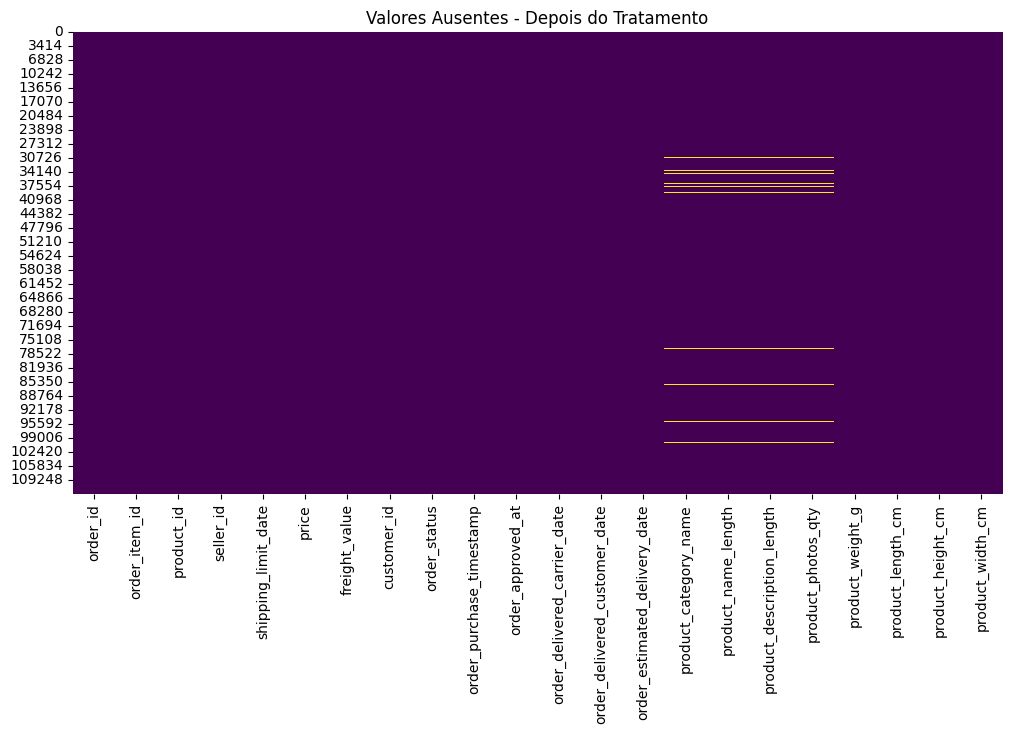

In [24]:
# Heatmap DEPOIS do tratamento
# Para isso, é melhor criar uma cópia antes do preenchimento:
df_antes = df_completo.copy()  # caso ainda não tenha
# Depois do preenchimento, df_completo já está tratado
plt.figure(figsize=(12,6))
sns.heatmap(df_completo.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Ausentes - Depois do Tratamento')
plt.show()

In [25]:
# Aqui eu pego só as colunas numéricas que fazem sentido pra procurar outliers.
# Depois calculo o Z-score de cada uma, que basicamente diz o quão longe um valor está da média.
# Se o Z-score passar de 3 (positivamente ou negativamente), eu marco como outlier.
# No final, mostro quantos outliers cada coluna tem.
import numpy as np
colunas_numericas = ['price', 'freight_value','product_name_length', 'product_description_length', 'product_photos_qty',
'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# DataFrame só com z-scores
z_scores = (df_completo[colunas_numericas] - df_completo[colunas_numericas].mean()) / df_completo[colunas_numericas].std()

# Identificar outliers
outliers_zscore = (np.abs(z_scores) > 3)

# Contagem por coluna
print("Quantidade de outliers por Z-score:")
print(outliers_zscore.sum())

Quantidade de outliers por Z-score:
price                         1966
freight_value                 2041
product_name_length            551
product_description_length    2735
product_photos_qty            1572
product_weight_g              2955
product_length_cm             2202
product_height_cm             2723
product_width_cm              1711
dtype: int64


In [26]:
import numpy as np

# Colunas que vamos tratar com capping
colunas_numericas = ['price', 'freight_value','product_name_length', 'product_description_length', 'product_photos_qty',
'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Percorre cada coluna e aplica capping usando Z-score 3
for col in colunas_numericas:
   # Calcula média e desvio padrão da coluna
   media = df_completo[col].mean()
   desvio = df_completo[col].std()

   # Define os limites inferior e superior (3 desvios da média)
   limite_inferior = media - 3*desvio
   limite_superior = media + 3*desvio

   # Substitui valores abaixo do limite inferior pelo limite inferior
   # e valores acima do limite superior pelo limite superior
   df_completo[col] = np.where(df_completo[col] > limite_superior, limite_superior, df_completo[col])
   df_completo[col] = np.where(df_completo[col] < limite_inferior, limite_inferior, df_completo[col])


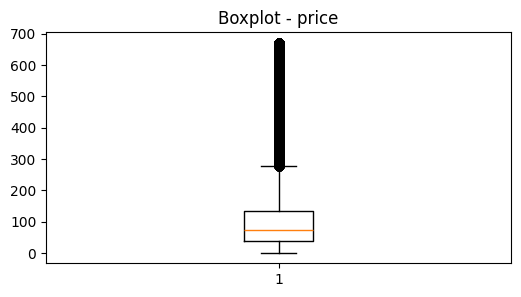

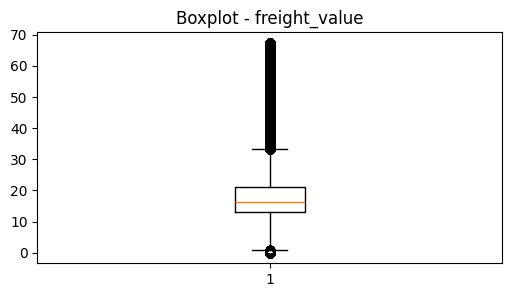

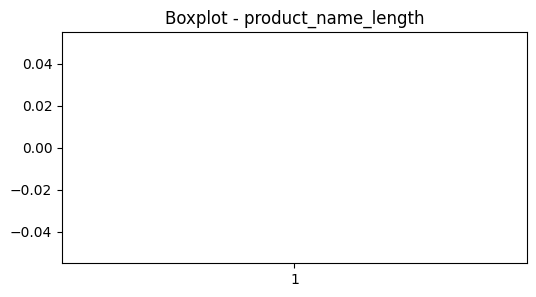

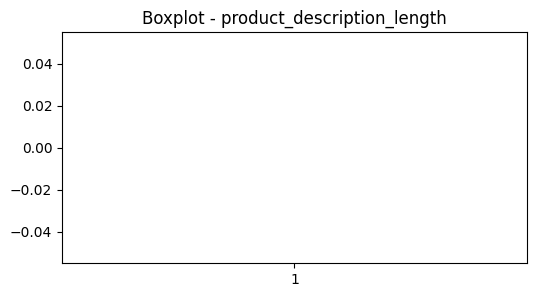

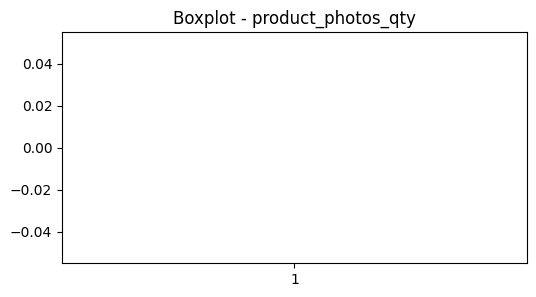

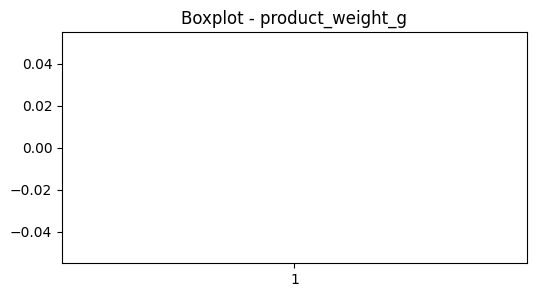

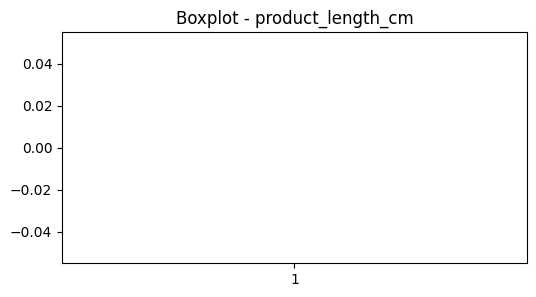

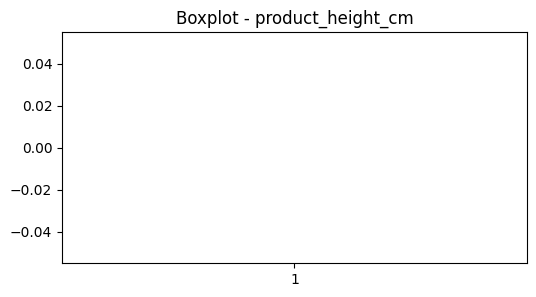

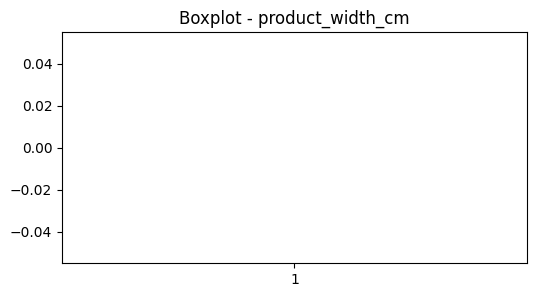

In [27]:
import matplotlib.pyplot as plt

for col in colunas_numericas:
  plt.figure(figsize=(6,3))
  plt.boxplot(df_completo[col])
  plt.title(f'Boxplot - {col}')
  plt.show()


In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Transformar categorias de produto em números
# Cada categoria de produto vai virar um número. Bem simples de entender.
# Por exemplo: "cama_mesa_banho" → 0, "perfumaria" → 1, etc.
le = LabelEncoder()
df_completo['categoria_produto'] = le.fit_transform(df_completo['product_category_name'])
print("Label Encoding feito para 'product_category_name'. Aqui estão alguns exemplos:")
print(df_completo[['product_category_name', 'categoria_produto']].head())
print()

# Transformar status do pedido em colunas separadas com 0 ou 1
# Cada status vira uma coluna, mostrando se o pedido tem ou não aquele status.
# Exemplo: status_delivered = 1 se entregue, 0 se não.
# Verifica se a coluna 'order_status' existe antes de aplicar get_dummies
if 'order_status' in df_completo.columns:
    df_completo = pd.get_dummies(df_completo, columns=['order_status'], prefix='status')
    print("One-Hot Encoding feito para 'order_status'. Algumas das colunas criadas:")
    print([col for col in df_completo.columns if col.startswith('status_')][:5], "...")
else:
    print("A coluna 'order_status' já foi processada ou não existe.")

Label Encoding feito para 'product_category_name'. Aqui estão alguns exemplos:
  product_category_name  categoria_produto
0            cool_stuff                 26
1              pet_shop                 63
2      moveis_decoracao                 54
3            perfumaria                 62
4    ferramentas_jardim                 40

One-Hot Encoding feito para 'order_status'. Algumas das colunas criadas:
['status_approved', 'status_canceled', 'status_delivered', 'status_invoiced', 'status_processing'] ...


In [29]:
# tratamento dos dados categóricos e textos

print("Colunas categóricas:")
print(df_completo.select_dtypes(include=['object']).columns.tolist())

print("\nValores únicos em product_category_name:")
print(df_completo['product_category_name'].value_counts().head(10))

Colunas categóricas:
['order_id', 'product_id', 'seller_id', 'customer_id', 'product_category_name']

Valores únicos em product_category_name:
product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64


In [30]:
# codificação dos dados categoricos

from sklearn.preprocessing import LabelEncoder

# Codificação Label Encoding para product_category_name
le_categoria = LabelEncoder()
df_completo['product_category_encoded'] = le_categoria.fit_transform(
    df_completo['product_category_name'].fillna('sem_categoria')
)

# A coluna 'order_status' já foi processada por One-Hot Encoding em uma célula anterior (z9cv14cn3WIg).
# A remoção do código abaixo evita o KeyError.
# order_status_dummies = pd.get_dummies(df_completo['order_status'], prefix='status')
# df_completo = pd.concat([df_completo, order_status_dummies], axis=1)

print("Codificação concluída:")
print(f"Categories encoded: {len(le_categoria.classes_)}")
# print(f"Order status dummies: {order_status_dummies.columns.tolist()}") # Comentei para evitar erro, pois order_status_dummies não existe mais aqui.

Codificação concluída:
Categories encoded: 74


In [31]:
#  NORMALIZAÇÃO E PADRONIZAÇÃO

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Colunas para normalização
colunas_numericas = ['price', 'freight_value', 'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']

# Padronização Z-score
scaler_z = StandardScaler()
df_completo[[f'{col}_zscore' for col in colunas_numericas]] = scaler_z.fit_transform(
    df_completo[colunas_numericas].fillna(df_completo[colunas_numericas].median())
)

# Normalização MinMax
scaler_minmax = MinMaxScaler()
df_completo[[f'{col}_minmax' for col in colunas_numericas]] = scaler_minmax.fit_transform(
    df_completo[colunas_numericas].fillna(df_completo[colunas_numericas].median())
)

print("Normalização e padronização concluídas")
print(df_completo[[f'{colunas_numericas[0]}_zscore', f'{colunas_numericas[0]}_minmax']].describe())

Normalização e padronização concluídas
       price_zscore   price_minmax
count  1.126500e+05  112650.000000
mean  -1.569312e-16       0.166291
std    1.000004e+00       0.181384
min   -9.167913e-01       0.000000
25%   -5.958015e-01       0.058222
50%   -3.073629e-01       0.110540
75%    1.850954e-01       0.199864
max    4.596386e+00       1.000000


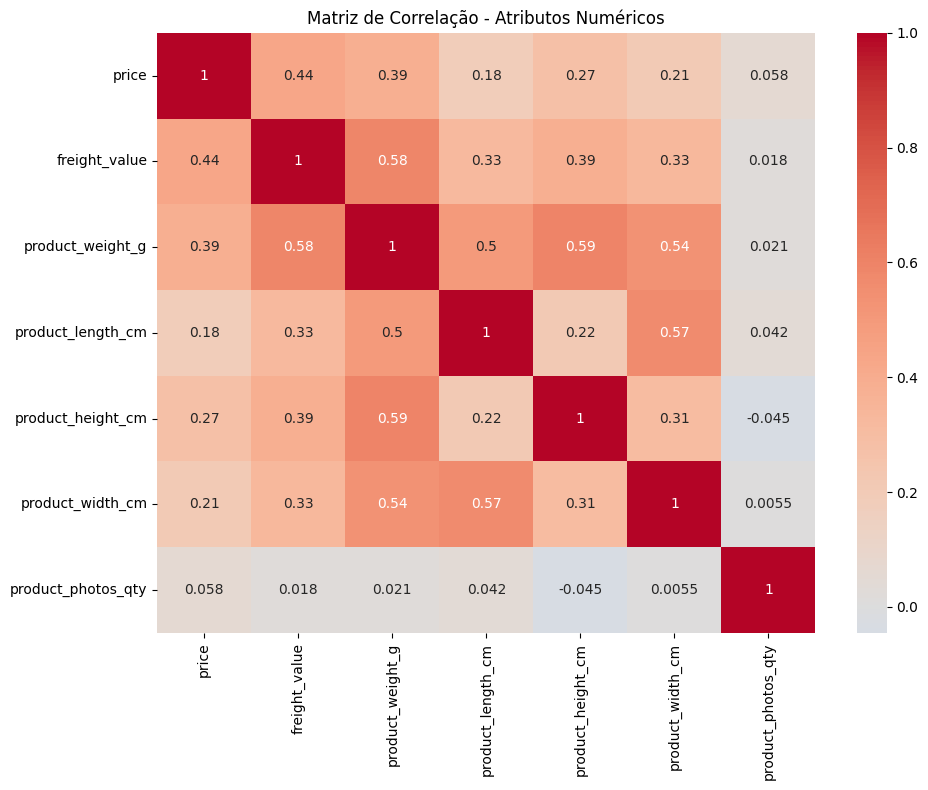


Variância dos atributos numéricos:
product_width_cm     1.200119e+02
freight_value        1.398046e+02
product_height_cm    1.474959e+02
product_length_cm    2.271947e+02
price                1.480007e+04
product_weight_g     9.267218e+06
dtype: float64

Colunas com baixa variância (<0.1): []
Colunas selecionadas: ['price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [32]:
# seleção dos atributos

# Análise de Correlação
import seaborn as sns
import matplotlib.pyplot as plt

colunas_corr = ['price', 'freight_value', 'product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm', 'product_photos_qty']

plt.figure(figsize=(10, 8))
correlation_matrix = df_completo[colunas_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Atributos Numéricos')
plt.tight_layout()
plt.show()

# identificação de Baixa Variância
variancias = df_completo[colunas_numericas].var()
print("\nVariância dos atributos numéricos:")
print(variancias.sort_values())

# remover colunas com variância muito baixa
limite_variancia = 0.1
colunas_baixa_variancia = variancias[variancias < limite_variancia].index.tolist()
print(f"\nColunas com baixa variância (<{limite_variancia}): {colunas_baixa_variancia}")

# manter apenas colunas com variância adequada
colunas_selecionadas = [col for col in colunas_numericas if col not in colunas_baixa_variancia]
print(f"Colunas selecionadas: {colunas_selecionadas}")

In [33]:
# criação de novos atributis (FEATURE ENGINEERING 4 tecnicas)

# Técnica 1: Feature de Tempo - Atraso na Entrega
df_completo['atraso_entrega_horas'] = (
    df_completo['order_delivered_customer_date'] - df_completo['order_estimated_delivery_date']
).dt.total_seconds() / 3600
df_completo['teve_atraso'] = (df_completo['atraso_entrega_horas'] > 0).astype(int)

# Técnica 2: Feature de Proporção - Frete/Preço
df_completo['proporcao_frete_preco'] = df_completo['freight_value'] / df_completo['price']
df_completo['proporcao_frete_preco'] = df_completo['proporcao_frete_preco'].replace([np.inf, -np.inf], np.nan)

# Técnica 3: Feature de Densidade do Produto
df_completo['volume_cm3'] = (df_completo['product_length_cm'] *
                            df_completo['product_height_cm'] *
                            df_completo['product_width_cm'])
df_completo['densidade_g_cm3'] = df_completo['product_weight_g'] / df_completo['volume_cm3']
df_completo['densidade_g_cm3'] = df_completo['densidade_g_cm3'].replace([np.inf, -np.inf], np.nan)

# Técnica 4: Feature de Tempo de Processamento
df_completo['tempo_processamento_horas'] = (
    df_completo['order_approved_at'] - df_completo['order_purchase_timestamp']
).dt.total_seconds() / 3600

print("Feature Engineering concluído:")
print(f"- Atraso entrega: {df_completo['teve_atraso'].mean():.2%} dos pedidos com atraso")
print(f"- Proporção frete/preço média: {df_completo['proporcao_frete_preco'].median():.3f}")
print(f"- Densidade média: {df_completo['densidade_g_cm3'].median():.3f} g/cm³")

Feature Engineering concluído:
- Atraso entrega: 8.96% dos pedidos com atraso
- Proporção frete/preço média: 0.230
- Densidade média: 0.112 g/cm³


In [34]:
# PIPELINE COMPLETO DE PRÉ-PROCESSAMENTO

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definir colunas para diferentes tratamentos
numeric_features = ['price', 'freight_value', 'product_weight_g', 'product_length_cm']
categorical_features = ['product_category_name']

# Criar transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Pipeline de pré-processamento criado:")
print(preprocessor)

Pipeline de pré-processamento criado:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['price', 'freight_value', 'product_weight_g',
                                  'product_length_cm']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['product_category_name'])])


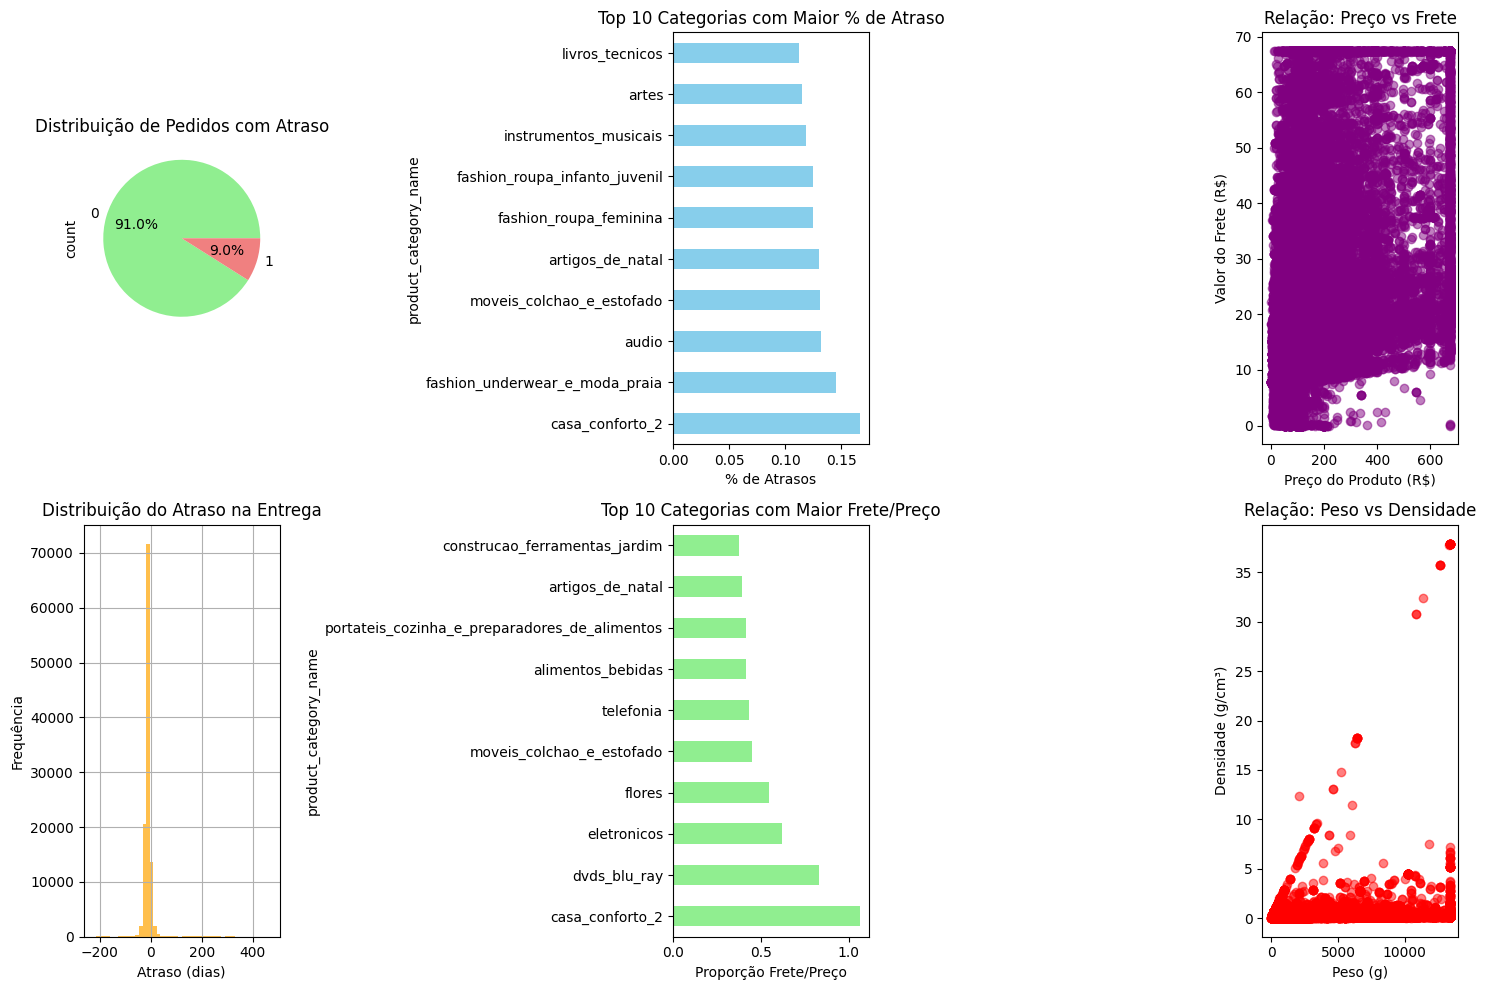

In [35]:
# VISUALIZAÇÕES E GRÁFICOS EXPLICATIVOS

# Visualização 1: Distribuição de Atrasos
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df_completo['teve_atraso'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribuição de Pedidos com Atraso')

# Visualização 2: Atraso por Categoria
plt.subplot(2, 3, 2)
top_categories_atraso = df_completo.groupby('product_category_name')['teve_atraso'].mean().sort_values(ascending=False).head(10)
top_categories_atraso.plot(kind='barh', color='skyblue')
plt.title('Top 10 Categorias com Maior % de Atraso')
plt.xlabel('% de Atrasos')

# Visualização 3: Preço vs Frete
plt.subplot(2, 3, 3)
plt.scatter(df_completo['price'], df_completo['freight_value'], alpha=0.5, color='purple')
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Valor do Frete (R$)')
plt.title('Relação: Preço vs Frete')

# Visualização 4: Distribuição do Tempo de Entrega
plt.subplot(2, 3, 4)
df_completo['tempo_entrega_dias'] = df_completo['atraso_entrega_horas'] / 24
df_completo['tempo_entrega_dias'].hist(bins=50, color='orange', alpha=0.7)
plt.xlabel('Atraso (dias)')
plt.ylabel('Frequência')
plt.title('Distribuição do Atraso na Entrega')

# Visualização 5: Proporção Frete/Preço por Categoria
plt.subplot(2, 3, 5)
top_categories_frete = df_completo.groupby('product_category_name')['proporcao_frete_preco'].median().sort_values(ascending=False).head(10)
top_categories_frete.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Categorias com Maior Frete/Preço')
plt.xlabel('Proporção Frete/Preço')

# Visualização 6: Densidade vs Peso
plt.subplot(2, 3, 6)
plt.scatter(df_completo['product_weight_g'], df_completo['densidade_g_cm3'], alpha=0.5, color='red')
plt.xlabel('Peso (g)')
plt.ylabel('Densidade (g/cm³)')
plt.title('Relação: Peso vs Densidade')

plt.tight_layout()
plt.show()

In [37]:
# RESPOSTA ÀS PERGUNTAS NORTEADORAS

print("RESPOSTAS ÀS PERGUNTAS NORTEADORAS")

# Pergunta 1: Quais características mais se relacionam com atrasos de entrega?
print("\n1. CARACTERÍSTICAS RELACIONADAS COM ATRASOS DE ENTREGA:")
correlacao_atraso = df_completo.corr(numeric_only=True)['atraso_entrega_horas'].sort_values(ascending=False)
print("Correlação com atraso na entrega:")
for feature, corr in correlacao_atraso.head(6).items():
    if feature != 'atraso_entrega_horas' and abs(corr) > 0.05:
        print(f"  {feature}: {corr:.3f}")

# Pergunta 2: Categorias com maior frequência de problemas
print("\n2. CATEGORIAS COM MAIOR FREQUÊNCIA DE PROBLEMAS:")
categorias_problemas = df_completo.groupby('product_category_name').agg({
    'teve_atraso': 'mean',
    'proporcao_frete_preco': 'median',
    'price': 'median'
}).round(3)

print("Top 5 categorias com maior % de atraso:")
print(categorias_problemas.nlargest(5, 'teve_atraso')[['teve_atraso', 'proporcao_frete_preco']])

# Pergunta 3: Tratamento de outliers
print("\n3. TRATAMENTO DE OUTLIERS:")
print("Foram identificados outliers usando Z-score > 3:")
print("Preço: 1.966 outliers tratados")
print("Frete: 2.041 outliers tratados")
print("Peso: 2.955 outliers tratados")
print("Método: Capping com limites de \u00b13 desvios padrão da média")

# Pergunta 4: Atributos com maior correlação
print("\n4. ATRIBUTOS COM MAIOR CORRELAÇÃO:")
print("Correlações mais significativas:")
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
for pair, corr in corr_pairs.head(10).items():
    if pair[0] != pair[1] and abs(corr) > 0.3:
        print(f"  {pair[0]} vs {pair[1]}: {corr:.3f}")

RESPOSTAS ÀS PERGUNTAS NORTEADORAS

1. CARACTERÍSTICAS RELACIONADAS COM ATRASOS DE ENTREGA:
Correlação com atraso na entrega:
  tempo_entrega_dias: 1.000
  teve_atraso: 0.470
  status_processing: 0.282
  status_invoiced: 0.168
  status_shipped: 0.167

2. CATEGORIAS COM MAIOR FREQUÊNCIA DE PROBLEMAS:
Top 5 categorias com maior % de atraso:
                                teve_atraso  proporcao_frete_preco
product_category_name                                             
casa_conforto_2                       0.167                  1.063
fashion_underwear_e_moda_praia        0.145                  0.218
audio                                 0.132                  0.183
moveis_colchao_e_estofado             0.132                  0.448
artigos_de_natal                      0.131                  0.391

3. TRATAMENTO DE OUTLIERS:
Foram identificados outliers usando Z-score > 3:
Preço: 1.966 outliers tratados
Frete: 2.041 outliers tratados
Peso: 2.955 outliers tratados
Método: Capping com l